<a href="https://colab.research.google.com/github/AKAB657/Instagram-Chat-Analysis/blob/main/INSTA_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import zipfile
!apt-get install tree
!apt-get install graphviz
!pip install graphviz
!pip install beautifulsoup4 textblob
!pip install seaborn matplotlib


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tree is already the newest version (2.0.2-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/INSTA_DATA/instagram-the_natures_guy-2024-10-29-Owc3KWNz.zip -d/content/drive/MyDrive/INSTA_DATA/extracted_data/

Archive:  /content/drive/MyDrive/INSTA_DATA/instagram-the_natures_guy-2024-10-29-Owc3KWNz.zip
   creating: /content/drive/MyDrive/INSTA_DATA/extracted_data/your_instagram_activity/
   creating: /content/drive/MyDrive/INSTA_DATA/extracted_data/your_instagram_activity/messages/
   creating: /content/drive/MyDrive/INSTA_DATA/extracted_data/your_instagram_activity/messages/inbox/
   creating: /content/drive/MyDrive/INSTA_DATA/extracted_data/your_instagram_activity/messages/inbox/gautamvinod_1303102761082722/
   creating: /content/drive/MyDrive/INSTA_DATA/extracted_data/your_instagram_activity/messages/inbox/gautamvinod_1303102761082722/photos/
 extracting: /content/drive/MyDrive/INSTA_DATA/extracted_data/your_instagram_activity/messages/inbox/gautamvinod_1303102761082722/photos/452327240_756495956475250_9006409853114222614_n_756495953141917.jpg  
 extracting: /content/drive/MyDrive/INSTA_DATA/extracted_data/your_instagram_activity/messages/inbox/gautamvinod_1303102761082722/message_1.html 

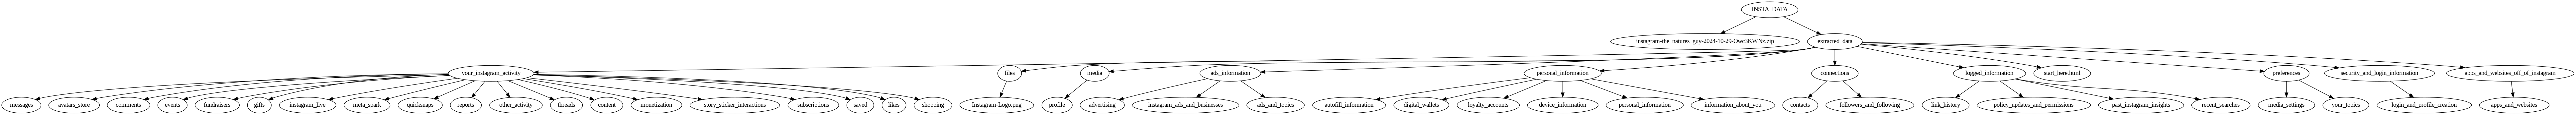

In [ ]:
import os
import graphviz

def generate_graphviz_tree(startpath, max_depth=3):
    """
    Recursively generates a directory tree using Graphviz.
    Limits the depth to prevent large outputs.
    """
    graph = graphviz.Digraph(format='png')

    def add_nodes_recursively(parent, path, level):
        if level > max_depth:
            return  # Stop if max depth is reached
        for entry in os.scandir(path):
            node_name = os.path.basename(entry.path)
            graph.node(entry.path, label=node_name)
            graph.edge(parent, entry.path)
            if entry.is_dir():
                add_nodes_recursively(entry.path, entry.path, level + 1)

    # Create root node
    root_label = os.path.basename(startpath) or "/"
    graph.node(startpath, label=root_label)
    add_nodes_recursively(startpath, startpath, 1)

    return graph

# Generate the tree for Google Drive with limited depth
drive_tree = generate_graphviz_tree("/content/drive/MyDrive/INSTA_DATA", max_depth=3)

# Render the tree and display the PNG output
drive_tree_path = "/content/drive_tree"
drive_tree.render(drive_tree_path)  # Save the tree visualization as PNG

from IPython.display import Image
Image(filename=drive_tree_path + ".png")  # Display the tree as an image


In [ ]:
!tree /content/drive/MyDrive/INSTA_DATA/extracted_data/


/content/drive/MyDrive/INSTA_DATA/extracted_data/
├── ads_information
│   ├── ads_and_topics
│   │   ├── ads_viewed.html
│   │   ├── posts_viewed.html
│   │   └── videos_watched.html
│   ├── advertising
│   │   └── no-data.txt
│   └── instagram_ads_and_businesses
│       └── advertisers_using_your_activity_or_information.html
├── apps_and_websites_off_of_instagram
│   └── apps_and_websites
│       ├── your_activity_off_meta_technologies
│       │   ├── 0.html
│       │   ├── 1.html
│       │   └── 2.html
│       ├── your_activity_off_meta_technologies.html
│       └── your_activity_off_meta_technologies_settings.html
├── connections
│   ├── contacts
│   │   └── no-data.txt
│   └── followers_and_following
│       ├── followers_1.html
│       ├── following.html
│       ├── recent_follow_requests.html
│       └── removed_suggestions.html
├── files
│   └── Instagram-Logo.png
├── logged_information
│   ├── link_history
│   │   └── no-data.txt
│   ├── past_instagram_insights
│   │   ├── audi

In [ ]:
import os
from bs4 import BeautifulSoup
from textblob import TextBlob
import pandas as pd

# Define the base path to the extracted Instagram data directory
base_path = "/content/drive/MyDrive/INSTA_DATA/extracted_data/"

# Function to extract text from an HTML file
def extract_text_from_html(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        soup = BeautifulSoup(f, 'html.parser')
        return soup.get_text(separator=' ', strip=True)

# Function to analyze the sentiment of text
def analyze_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity, blob.sentiment.subjectivity

# Function to recursively traverse directories and analyze text from HTML files
def analyze_instagram_data(directory):
    sentiment_results = []
    for root, _, files in os.walk(directory):
        for file in files:
            if file.endswith('.html'):
                file_path = os.path.join(root, file)
                text = extract_text_from_html(file_path)
                polarity, subjectivity = analyze_sentiment(text)
                sentiment_results.append({
                    'File': file_path,
                    'Polarity': polarity,
                    'Subjectivity': subjectivity,
                    'Word Count': len(text.split())
                })
    return sentiment_results

# Analyze the Instagram data
results = analyze_instagram_data(base_path)

# Convert the results to a DataFrame
df = pd.DataFrame(results)

# Display the first few results
from IPython.display import display
display(df.head())

# Save the results to a CSV file for download
df.to_csv('/content/instagram_sentiment_analysis.csv', index=False)

print("Analysis complete! Download the CSV file below:")


File  Polarity  Subjectivity  \
0  /content/drive/MyDrive/INSTA_DATA/extracted_da...  0.065967      0.435043   
1  /content/drive/MyDrive/INSTA_DATA/extracted_da... -0.400000      0.700000   
2  /content/drive/MyDrive/INSTA_DATA/extracted_da... -0.308961      0.533477   
3  /content/drive/MyDrive/INSTA_DATA/extracted_da...  0.000000      0.000000   
4  /content/drive/MyDrive/INSTA_DATA/extracted_da...  0.000000      0.000000   

   Word Count  
0         786  
1          39  
2        7919  
3          27  
4         104

Analysis complete! Download the CSV file below:


from matplotlib import pyplot as plt
_df_0['Polarity'].plot(kind='hist', bins=20, title='Polarity')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Subjectivity'].plot(kind='hist', bins=20, title='Subjectivity')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Word Count'].plot(kind='hist', bins=20, title='Word Count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('File').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Polarity', y='Subjectivity', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Subjectivity', y='Word Count', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6['Polarity'].plot(kind='line', figsize=(8, 4), title='Polarity')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_7['Subjectivity'].plot(kind='line', figsize=(8, 4), title='Subjectivity')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_8['Word Count'].plot(kind='line', figsize=(8, 4), title='Word Count')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_9['File'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_9, x='Polarity', y='File', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_10['File'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_10, x='Subjectivity', y='File', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_11['File'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_11, x='Word Count', y='File', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
_df_12['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_13['Polarity'].plot(kind='hist', bins=20, title='Polarity')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_14['Subjectivity'].plot(kind='hist', bins=20, title='Subjectivity')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_15['Word Count'].plot(kind='hist', bins=20, title='Word Count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_16.groupby('File').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_17.plot(kind='scatter', x='index', y='Polarity', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_18.plot(kind='scatter', x='Polarity', y='Subjectivity', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_19.plot(kind='scatter', x='Subjectivity', y='Word Count', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Polarity']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_20.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('File')):
  _plot_series(series, series_name, i)
  fig.legend(title='File', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Polarity')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Subjectivity']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_21.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('File')):
  _plot_series(series, series_name, i)
  fig.legend(title='File', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Subjectivity')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Word Count']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_22.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('File')):
  _plot_series(series, series_name, i)
  fig.legend(title='File', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Word Count')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_23.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('File')):
  _plot_series(series, series_name, i)
  fig.legend(title='File', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_24['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_25['Polarity'].plot(kind='line', figsize=(8, 4), title='Polarity')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_26['Subjectivity'].plot(kind='line', figsize=(8, 4), title='Subjectivity')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_27['Word Count'].plot(kind='line', figsize=(8, 4), title='Word Count')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_28['File'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_28, x='index', y='File', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_29['File'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_29, x='Polarity', y='File', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_30['File'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_30, x='Subjectivity', y='File', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_31['File'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_31, x='Word Count', y='File', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

ERROR:root:Did not find quickchart key chart-dc740ec2-988a-44ee-8c7e-311126ee70c6 in chart cache


In [ ]:
import os
from bs4 import BeautifulSoup
from textblob import TextBlob
import pandas as pd

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Define the base path to your extracted Instagram data directory
base_path = "/content/drive/MyDrive/INSTA_DATA/extracted_data/"

# Function to extract text content from an HTML file
def extract_text_from_html(file_path):
    try:
        with open(file_path, 'r', encoding='utf-8') as f:
            soup = BeautifulSoup(f, 'html.parser')
            return soup.get_text(separator=' ', strip=True)
    except Exception as e:
        print(f"Error reading {file_path}: {e}")
        return ""

# Function to analyze sentiment of text
def analyze_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity, blob.sentiment.subjectivity

# Function to analyze all HTML files within a specific directory
def analyze_directory(directory):
    sentiment_results = []
    for root, _, files in os.walk(directory):
        for file in files:
            if file.endswith('.html'):
                file_path = os.path.join(root, file)
                text = extract_text_from_html(file_path)
                polarity, subjectivity = analyze_sentiment(text)
                sentiment_results.append({
                    'Directory': os.path.basename(root),
                    'File': file,
                    'Polarity': polarity,
                    'Subjectivity': subjectivity,
                    'Word Count': len(text.split()),
                    'Path': file_path
                })
    return sentiment_results

# Analyze each main directory separately
directories_to_analyze = [
    "ads_information",
    "apps_and_websites_off_of_instagram",
    "connections",
    "logged_information",
    "personal_information",
    "preferences",
    "security_and_login_information",
    "your_instagram_activity"
]

all_results = []
for directory in directories_to_analyze:
    dir_path = os.path.join(base_path, directory)
    if os.path.exists(dir_path):
        print(f"Analyzing directory: {directory}")
        all_results.extend(analyze_directory(dir_path))

# Convert the results into a DataFrame
df = pd.DataFrame(all_results)

# Display the first few rows of the DataFrame
from IPython.display import display
print("First few rows of the analysis:")
display(df.head(20))  # Adjust to show more rows if needed

# Save the DataFrame as CSV to Google Drive
csv_path = "/content/drive/MyDrive/instagram_detailed_analysis.csv"
df.to_csv(csv_path, index=False)

print(f"Analysis complete! Results saved to: {csv_path}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Analyzing directory: ads_information
Analyzing directory: apps_and_websites_off_of_instagram
Analyzing directory: connections
Analyzing directory: logged_information
Analyzing directory: personal_information
Analyzing directory: preferences
Analyzing directory: security_and_login_information
Analyzing directory: your_instagram_activity
First few rows of the analysis:


Directory  \
0          instagram_ads_and_businesses   
1                        ads_and_topics   
2                        ads_and_topics   
3                        ads_and_topics   
4                     apps_and_websites   
5                     apps_and_websites   
6   your_activity_off_meta_technologies   
7   your_activity_off_meta_technologies   
8   your_activity_off_meta_technologies   
9               followers_and_following   
10              followers_and_following   
11              followers_and_following   
12              followers_and_following   
13              past_instagram_insights   
14              past_instagram_insights   
15              past_instagram_insights   
16                      recent_searches   
17                   device_information   
18                   device_information   
19                 personal_information   

                                                 File  Polarity  Subjectivity  \
0   advertisers_using_your_activity_or_information...  0.065100      0.251455   
1                                 videos_watched.html  0.000000      0.000000   
2                                     ads_viewed.html  0.000000      0.000000   
3                                   posts_viewed.html  0.000000      0.000000   
4   your_activity_off_meta_technologies_settings.html  0.000000      0.295833   
5            your_activity_off_meta_technologies.html -0.071429      0.142857   
6                                              0.html  0.000000      0.000000   
7                                              1.html  0.000000      0.000000   
8                                              2.html -0.071429      0.142857   
9                                    followers_1.html  0.000000      0.000000   
10                                     following.html  0.000000      0.100000   
11                        recent_follow_requests.html  0.100000      0.437500   
12                           removed_suggestions.html  0.000000      0.000000   
13                              profiles_reached.html  0.088920      0.403125   
14                          content_interactions.html  0.123737      0.377778   
15                             audience_insights.html  0.195238      0.514286   
16                              profile_searches.html  0.000000      0.250000   
17                                       devices.html  0.000000      0.066667   
18                            camera_information.html  0.000000      0.000000   
19                 instagram_profile_information.html -0.073377      0.395238   

    Word Count                                               Path  
0         1481  /content/drive/MyDrive/INSTA_DATA/extracted_da...  
1          331  /content/drive/MyDrive/INSTA_DATA/extracted_da...  
2           35  /content/drive/MyDrive/INSTA_DATA/extracted_da...  
3          143  /content/drive/MyDrive/INSTA_DATA/extracted_da...  
4           70  /content/drive/MyDrive/INSTA_DATA/extracted_da...  
5           28  /content/drive/MyDrive/INSTA_DATA/extracted_da...  
6          170  /content/drive/MyDrive/INSTA_DATA/extracted_da...  
7           48  /content/drive/MyDrive/INSTA_DATA/extracted_da...  
8           39  /content/drive/MyDrive/INSTA_DATA/extracted_da...  
9           38  /content/drive/MyDrive/INSTA_DATA/extracted_da...  
10         135  /content/drive/MyDrive/INSTA_DATA/extracted_da...  
11          23  /content/drive/MyDrive/INSTA_DATA/extracted_da...  
12         101  /content/drive/MyDrive/INSTA_DATA/extracted_da...  
13         101  /content/drive/MyDrive/INSTA_DATA/extracted_da...  
14         150  /content/drive/MyDrive/INSTA_DATA/extracted_da...  
15         179  /content/drive/MyDrive/INSTA_DATA/extracted_da...  
16          17  /content/drive/MyDrive/INSTA_DATA/extracted_da...  
17          30  /content/drive/MyDrive/INSTA_DATA/extracted_da...  
18          19  /content/drive/MyDrive/INSTA_DATA/extracted_da...  
19          40  /content/drive/MyDrive/INSTA_DATA/extracted_da..

Analysis complete! Results saved to: /content/drive/MyDrive/instagram_detailed_analysis.csv


from matplotlib import pyplot as plt
_df_32['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_33['Polarity'].plot(kind='hist', bins=20, title='Polarity')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_34['Subjectivity'].plot(kind='hist', bins=20, title='Subjectivity')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_35['Word Count'].plot(kind='hist', bins=20, title='Word Count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_36.plot(kind='scatter', x='index', y='Polarity', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_37.plot(kind='scatter', x='Polarity', y='Subjectivity', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_38.plot(kind='scatter', x='Subjectivity', y='Word Count', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Polarity']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_39.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Polarity')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Subjectivity']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_40.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Subjectivity')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Word Count']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_41.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Word Count')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_42.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_43['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_44['Polarity'].plot(kind='line', figsize=(8, 4), title='Polarity')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_45['Subjectivity'].plot(kind='line', figsize=(8, 4), title='Subjectivity')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_46['Word Count'].plot(kind='line', figsize=(8, 4), title='Word Count')
plt.gca().spines[['top', 'right']].set_visible(False)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Analyzing directory: ads_information
Analyzing directory: apps_and_websites_off_of_instagram
Analyzing directory: connections
Analyzing directory: logged_information
Analyzing directory: personal_information
Analyzing directory: preferences
Analyzing directory: security_and_login_information
Analyzing directory: your_instagram_activity
First few rows of the analysis:


Directory  \
0          instagram_ads_and_businesses   
1                        ads_and_topics   
2                        ads_and_topics   
3                        ads_and_topics   
4                     apps_and_websites   
5                     apps_and_websites   
6   your_activity_off_meta_technologies   
7   your_activity_off_meta_technologies   
8   your_activity_off_meta_technologies   
9               followers_and_following   
10              followers_and_following   
11              followers_and_following   
12              followers_and_following   
13              past_instagram_insights   
14              past_instagram_insights   
15              past_instagram_insights   
16                      recent_searches   
17                   device_information   
18                   device_information   
19                 personal_information   

                                                 File  Polarity  Subjectivity  \
0   advertisers_using_your_activity_or_information...  0.065100      0.251455   
1                                 videos_watched.html  0.000000      0.000000   
2                                     ads_viewed.html  0.000000      0.000000   
3                                   posts_viewed.html  0.000000      0.000000   
4   your_activity_off_meta_technologies_settings.html  0.000000      0.295833   
5            your_activity_off_meta_technologies.html -0.071429      0.142857   
6                                              0.html  0.000000      0.000000   
7                                              1.html  0.000000      0.000000   
8                                              2.html -0.071429      0.142857   
9                                    followers_1.html  0.000000      0.000000   
10                                     following.html  0.000000      0.100000   
11                        recent_follow_requests.html  0.100000      0.437500   
12                           removed_suggestions.html  0.000000      0.000000   
13                              profiles_reached.html  0.088920      0.403125   
14                          content_interactions.html  0.123737      0.377778   
15                             audience_insights.html  0.195238      0.514286   
16                              profile_searches.html  0.000000      0.250000   
17                                       devices.html  0.000000      0.066667   
18                            camera_information.html  0.000000      0.000000   
19                 instagram_profile_information.html -0.073377      0.395238   

    Word Count                                               Path  
0         1481  /content/drive/MyDrive/INSTA_DATA/extracted_da...  
1          331  /content/drive/MyDrive/INSTA_DATA/extracted_da...  
2           35  /content/drive/MyDrive/INSTA_DATA/extracted_da...  
3          143  /content/drive/MyDrive/INSTA_DATA/extracted_da...  
4           70  /content/drive/MyDrive/INSTA_DATA/extracted_da...  
5           28  /content/drive/MyDrive/INSTA_DATA/extracted_da...  
6          170  /content/drive/MyDrive/INSTA_DATA/extracted_da...  
7           48  /content/drive/MyDrive/INSTA_DATA/extracted_da...  
8           39  /content/drive/MyDrive/INSTA_DATA/extracted_da...  
9           38  /content/drive/MyDrive/INSTA_DATA/extracted_da...  
10         135  /content/drive/MyDrive/INSTA_DATA/extracted_da...  
11          23  /content/drive/MyDrive/INSTA_DATA/extracted_da...  
12         101  /content/drive/MyDrive/INSTA_DATA/extracted_da...  
13         101  /content/drive/MyDrive/INSTA_DATA/extracted_da...  
14         150  /content/drive/MyDrive/INSTA_DATA/extracted_da...  
15         179  /content/drive/MyDrive/INSTA_DATA/extracted_da...  
16          17  /content/drive/MyDrive/INSTA_DATA/extracted_da...  
17          30  /content/drive/MyDrive/INSTA_DATA/extracted_da...  
18          19  /content/drive/MyDrive/INSTA_DATA/extracted_da...  
19          40  /content/drive/MyDrive/INSTA_DATA/extracted_da..

Analysis complete! Results saved to: /content/drive/MyDrive/instagram_detailed_analysis.csv


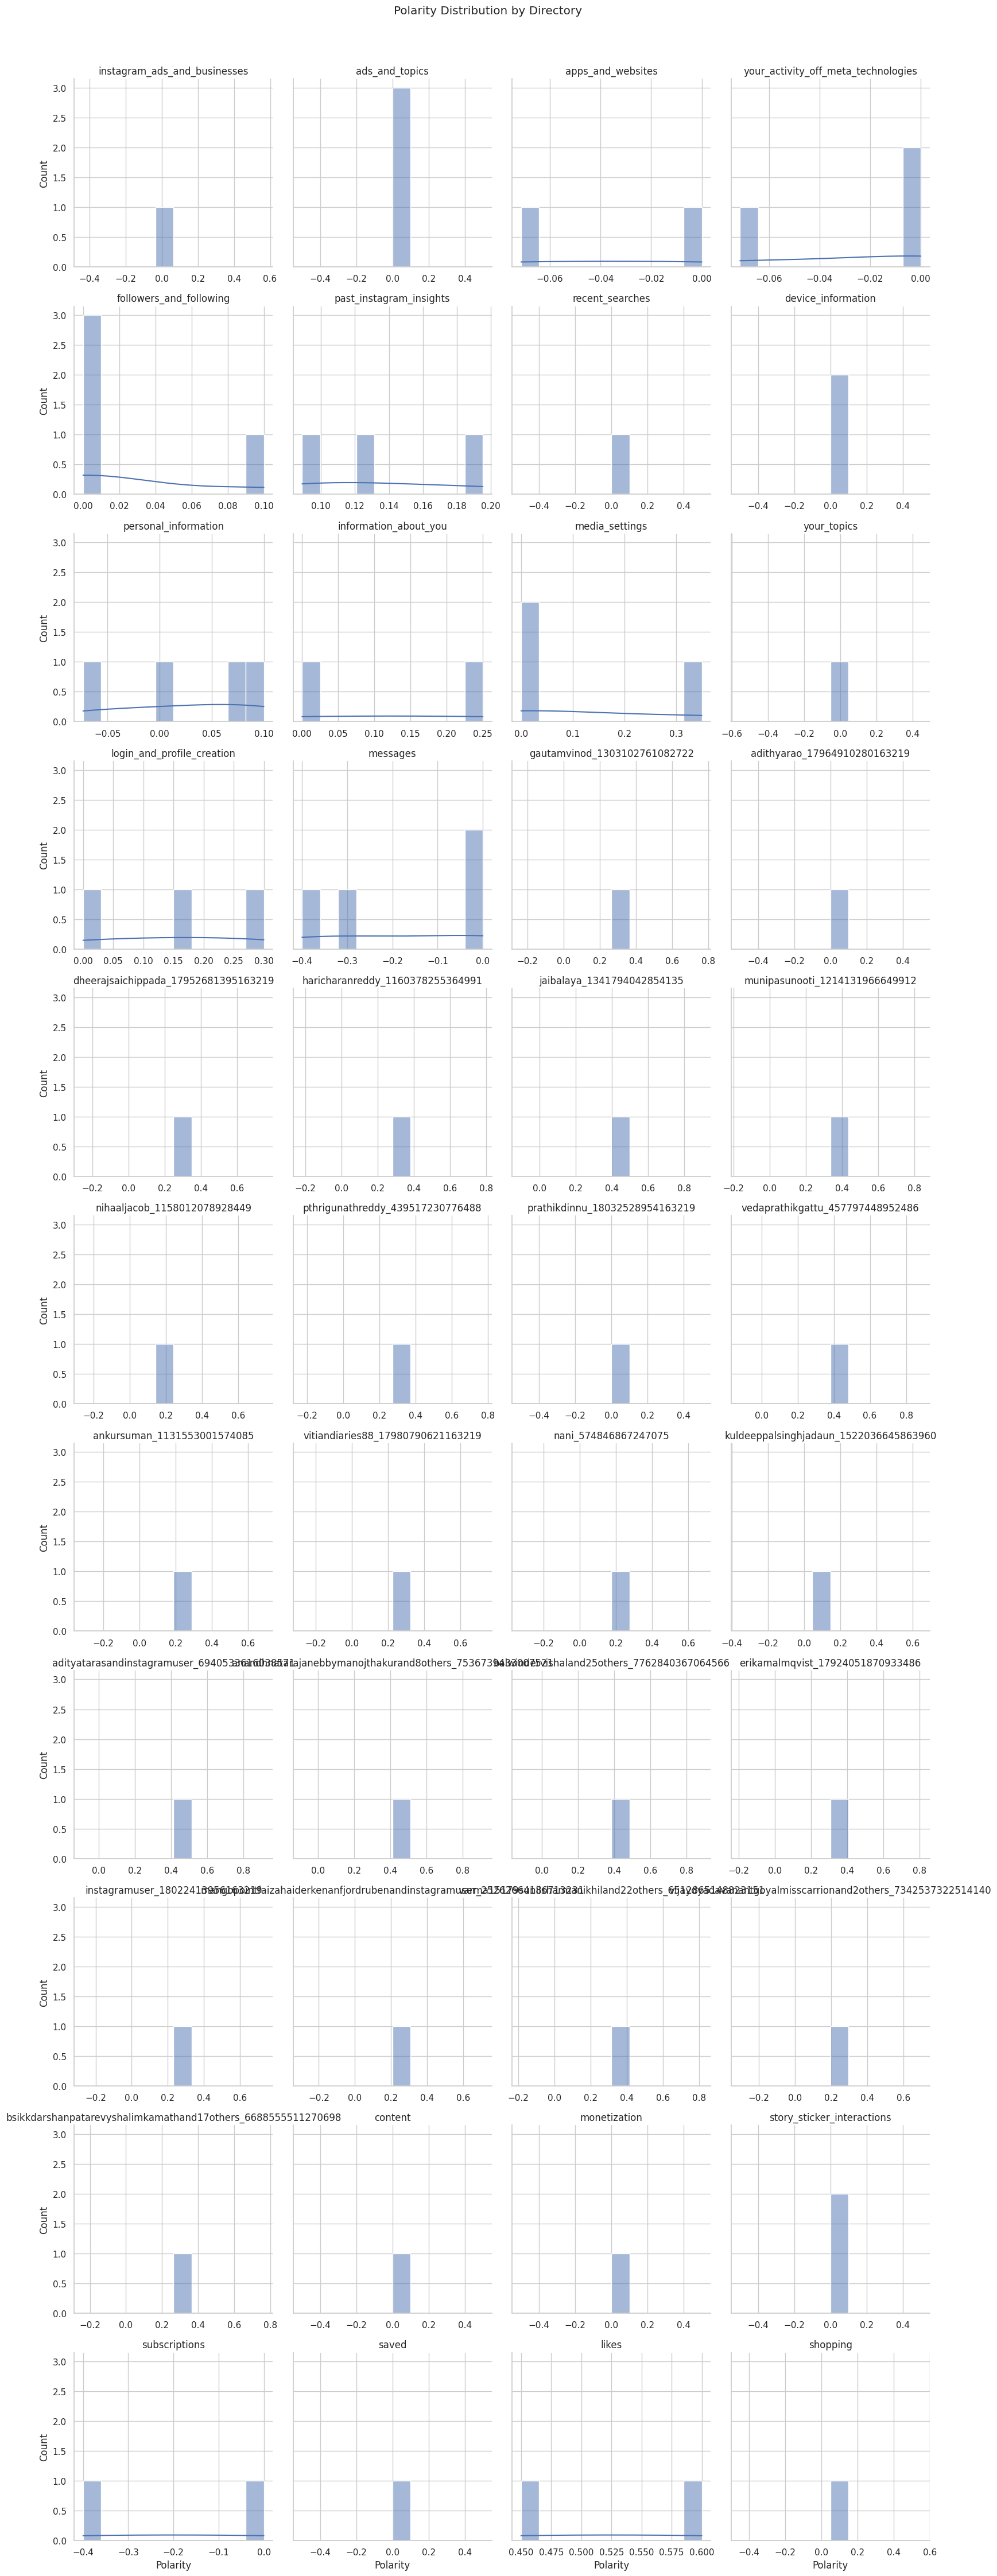

<ipython-input-36-8734cc0888d1>:96: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.



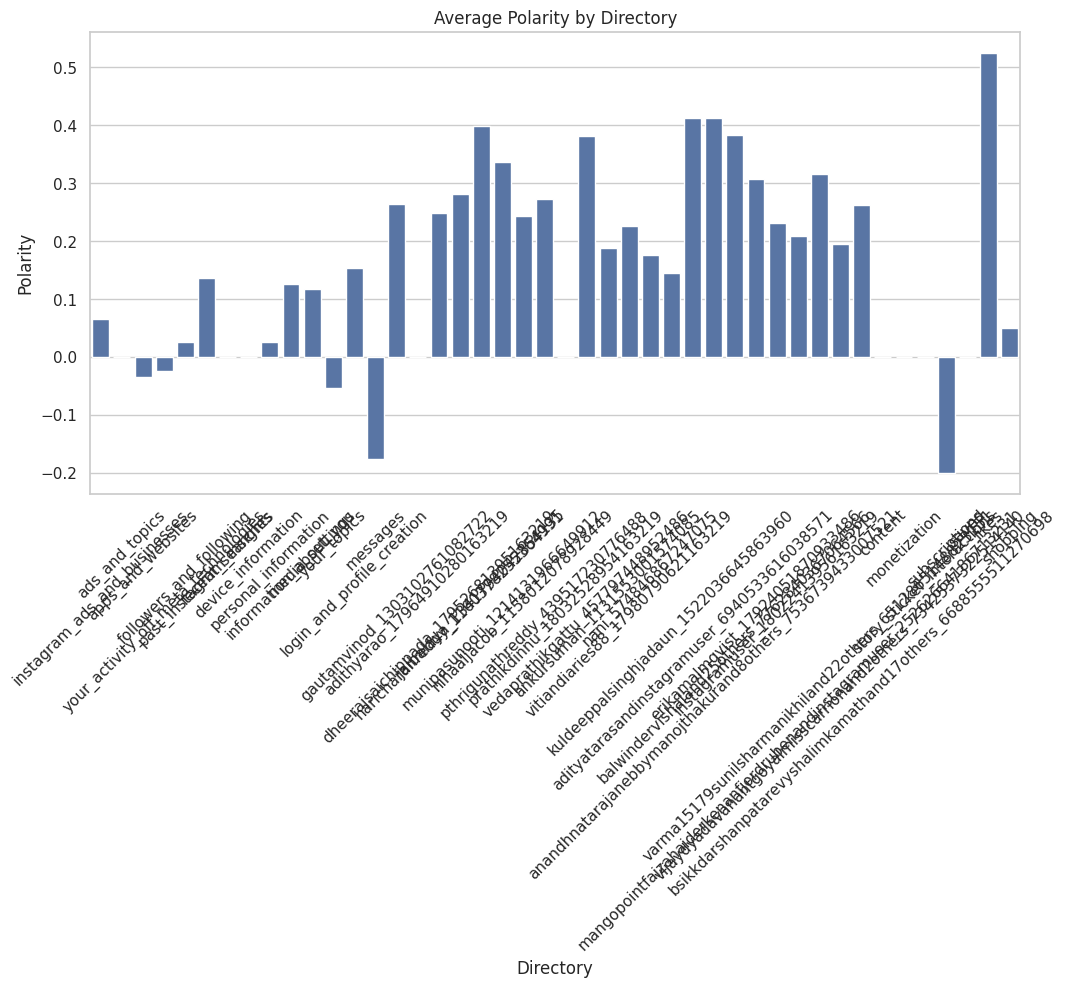

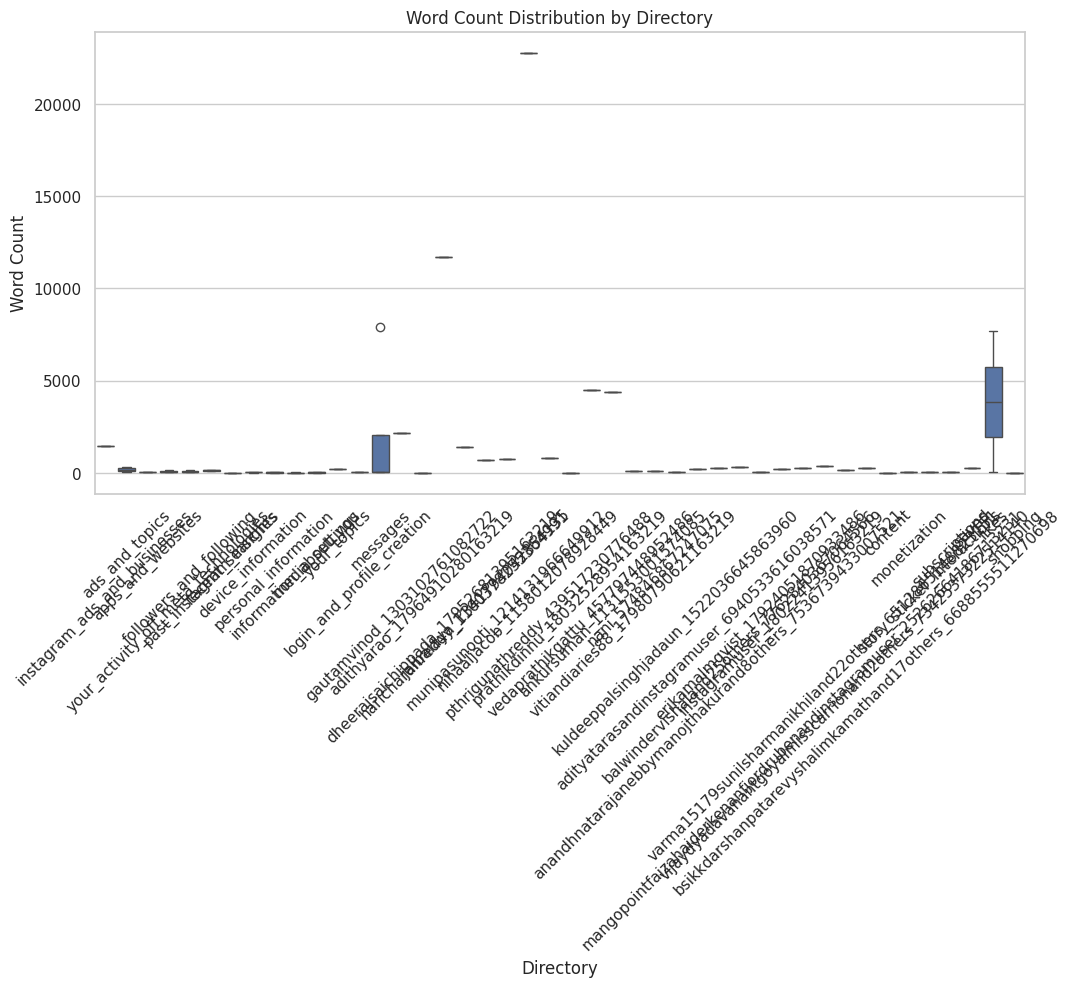

from matplotlib import pyplot as plt
_df_47['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_48['Polarity'].plot(kind='hist', bins=20, title='Polarity')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_49['Subjectivity'].plot(kind='hist', bins=20, title='Subjectivity')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_50['Word Count'].plot(kind='hist', bins=20, title='Word Count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_51.plot(kind='scatter', x='index', y='Polarity', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_52.plot(kind='scatter', x='Polarity', y='Subjectivity', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_53.plot(kind='scatter', x='Subjectivity', y='Word Count', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Polarity']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_54.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Polarity')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Subjectivity']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_55.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Subjectivity')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Word Count']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_56.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Word Count')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_57.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_58['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_59['Polarity'].plot(kind='line', figsize=(8, 4), title='Polarity')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_60['Subjectivity'].plot(kind='line', figsize=(8, 4), title='Subjectivity')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_61['Word Count'].plot(kind='line', figsize=(8, 4), title='Word Count')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
import os
from bs4 import BeautifulSoup
from textblob import TextBlob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Define the base path to your extracted Instagram data directory
base_path = "/content/drive/MyDrive/INSTA_DATA/extracted_data/"

# Function to extract text content from an HTML file
def extract_text_from_html(file_path):
    try:
        with open(file_path, 'r', encoding='utf-8') as f:
            soup = BeautifulSoup(f, 'html.parser')
            return soup.get_text(separator=' ', strip=True)
    except Exception as e:
        print(f"Error reading {file_path}: {e}")
        return ""

# Function to analyze sentiment of text
def analyze_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity, blob.sentiment.subjectivity

# Function to analyze all HTML files within a specific directory
def analyze_directory(directory):
    sentiment_results = []
    for root, _, files in os.walk(directory):
        for file in files:
            if file.endswith('.html'):
                file_path = os.path.join(root, file)
                text = extract_text_from_html(file_path)
                polarity, subjectivity = analyze_sentiment(text)
                sentiment_results.append({
                    'Directory': os.path.basename(root),
                    'File': file,
                    'Polarity': polarity,
                    'Subjectivity': subjectivity,
                    'Word Count': len(text.split()),
                    'Path': file_path
                })
    return sentiment_results

# Analyze each main directory separately
directories_to_analyze = [
    "ads_information",
    "apps_and_websites_off_of_instagram",
    "connections",
    "logged_information",
    "personal_information",
    "preferences",
    "security_and_login_information",
    "your_instagram_activity"
]

all_results = []
for directory in directories_to_analyze:
    dir_path = os.path.join(base_path, directory)
    if os.path.exists(dir_path):
        print(f"Analyzing directory: {directory}")
        all_results.extend(analyze_directory(dir_path))

# Convert the results into a DataFrame
df = pd.DataFrame(all_results)

# Display the first few rows of the DataFrame
from IPython.display import display
print("First few rows of the analysis:")
display(df.head(20))  # Adjust to show more rows if needed

# Save the DataFrame as CSV to Google Drive
csv_path = "/content/drive/MyDrive/instagram_detailed_analysis.csv"
df.to_csv(csv_path, index=False)

print(f"Analysis complete! Results saved to: {csv_path}")

# ----------- Visualization Section --------------

# Set up the plotting style
sns.set(style="whitegrid")

# 1. Faceted Distribution: Polarity Distribution by Directory
g = sns.FacetGrid(df, col="Directory", col_wrap=4, height=4, sharex=False)
g.map(sns.histplot, "Polarity", bins=10, kde=True)
g.set_titles("{col_name}")
plt.suptitle("Polarity Distribution by Directory", y=1.02)
plt.show()

# 2. Categorical Distribution: Average Polarity by Directory
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x="Directory", y="Polarity", ci=None)
plt.xticks(rotation=45)
plt.title("Average Polarity by Directory")
plt.show()

# 3. Categorical Distribution: Word Count by Directory
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="Directory", y="Word Count")
plt.xticks(rotation=45)
plt.title("Word Count Distribution by Directory")
plt.show()


In [ ]:
from google.colab import drive
import pandas as pd
from bs4 import BeautifulSoup
from collections import Counter

# Step 1: Mount Google Drive
drive.mount('/content/drive')

# Step 2: Define Path to the `liked_posts.html` File
liked_posts_path = '/content/drive/MyDrive/INSTA_DATA/your_instagram_activity/likes/liked_posts.html'

# Step 3: Function to Parse HTML and Extract Post Data
def parse_likes_from_html(file_path):
    """Extract post titles or IDs from liked_posts.html to count likes."""
    with open(file_path, 'r', encoding='utf-8') as file:
        soup = BeautifulSoup(file, 'html.parser')

        # Extract all divs or elements containing post information
        posts = [div.get_text() for div in soup.find_all('div')]  # Adjust tag if needed
        return posts

# Step 4: Extract Posts Data from the HTML File
liked_posts = parse_likes_from_html(liked_posts_path)

# Step 5: Count the Number of Likes for Each Post
post_likes_count = Counter(liked_posts)

# Step 6: Display the Posts and Their Like Counts
df_likes = pd.DataFrame(post_likes_count.items(), columns=['Post', 'Likes'])
print(df_likes)

# Step 7: Sort and Display Top 10 Most Liked Posts (Optional)
df_top_likes = df_likes.sort_values(by='Likes', ascending=False).head(10)
print("\nTop 10 Most Liked Posts:")
print(df_top_likes)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/INSTA_DATA/your_instagram_activity/likes/liked_posts.html'

In [ ]:
# Step 2: Define Paths to Files
base_path = "/content/drive/MyDrive/INSTA_DATA/extracted_data/your_instagram_activity"
story_likes_path = f"{base_path}/story_sticker_interactions/story_likes.html"
polls_path = f"{base_path}/story_sticker_interactions/polls.html"
liked_posts_path = f"{base_path}/likes/liked_posts.html"
liked_comments_path = f"{base_path}/likes/liked_comments.html"

# Step 3: Install Required Libraries
!pip install beautifulsoup4 pandas

# Step 4: Import Necessary Libraries
import pandas as pd
from bs4 import BeautifulSoup
from collections import Counter

# Step 5: Function to Parse HTML Files and Extract Text Content
def extract_text_from_html(file_path):
    """Extract text content from an HTML file."""
    with open(file_path, 'r', encoding='utf-8') as f:
        soup = BeautifulSoup(f, 'html.parser')
        return [element.get_text() for element in soup.find_all('div')]

# Step 6: Extract Data from Files
story_likes = extract_text_from_html(story_likes_path)
polls = extract_text_from_html(polls_path)
liked_posts = extract_text_from_html(liked_posts_path)
liked_comments = extract_text_from_html(liked_comments_path)

# Step 7: Create DataFrames for Easier Analysis
df_story_likes = pd.DataFrame(story_likes, columns=['Story Likes'])
df_polls = pd.DataFrame(polls, columns=['Polls'])
df_liked_posts = pd.DataFrame(liked_posts, columns=['Liked Posts'])
df_liked_comments = pd.DataFrame(liked_comments, columns=['Liked Comments'])

# Step 8: Engagement Analysis - Count Interactions
print(f"Total Story Likes: {len(df_story_likes)}")
print(f"Total Poll Interactions: {len(df_polls)}")
print(f"Total Liked Posts: {len(df_liked_posts)}")
print(f"Total Liked Comments: {len(df_liked_comments)}")

Total Story Likes: 22
Total Poll Interactions: 40
Total Liked Posts: 6588
Total Liked Comments: 30


In [ ]:
# @title Sentiment Analysis
from bs4 import BeautifulSoup
import os
import pandas as pd
from textblob import TextBlob
from google.colab import drive

# Step 1: Mount Google Drive
drive.mount('/content/drive')

# Step 2: Define the path to the Instagram messages folder
messages_path = "/content/drive/MyDrive/INSTA_DATA/extracted_data/your_instagram_activity/messages/inbox/"

# Step 3: Extract messages from HTML based on the new structure
def extract_messages_from_html(file_path):
    messages = []
    print(f"Processing: {file_path}")

    try:
        with open(file_path, 'r', encoding='utf-8') as f:
            soup = BeautifulSoup(f, 'html.parser')

            # Extract the divs that contain messages
            message_divs = soup.find_all('div', class_='_3-95 _a6-p')

            for div in message_divs:
                # Extract the text inside the nested divs
                text = div.get_text(strip=True)
                if text:  # Ignore empty messages
                    messages.append(text)

    except Exception as e:
        print(f"Error processing {file_path}: {e}")

    print(f"Extracted {len(messages)} messages from {file_path}")
    return messages

# Step 4: Collect all messages from the inbox folder
def collect_all_messages(messages_path):
    all_messages = []
    for folder_name in os.listdir(messages_path):
        folder_path = os.path.join(messages_path, folder_name)
        if os.path.isdir(folder_path):
            for file_name in os.listdir(folder_path):
                if file_name.endswith('.html'):
                    file_path = os.path.join(folder_path, file_name)
                    messages = extract_messages_from_html(file_path)
                    all_messages.extend(messages)

    print(f"Total messages collected: {len(all_messages)}")
    return all_messages

# Step 5: Perform sentiment analysis on messages
def analyze_sentiment(messages):
    sentiments = []
    for message in messages:
        blob = TextBlob(message)
        sentiment_score = blob.sentiment.polarity  # Polarity ranges from -1 to 1
        sentiments.append({
            'message': message,
            'sentiment_score': sentiment_score,
            'sentiment': 'positive' if sentiment_score > 0 else 'negative' if sentiment_score < 0 else 'neutral'
        })
    return pd.DataFrame(sentiments)

# Step 6: Collect messages and perform sentiment analysis
all_messages = collect_all_messages(messages_path)

if not all_messages:
    print("No messages were extracted. Please check the HTML structure or folder path.")
else:
    sentiment_df = analyze_sentiment(all_messages)

    # Step 7: Display sentiment results using Pandas
    from IPython.display import display
    display(sentiment_df)

    # Save results to a CSV file (optional)
    output_path = "/content/drive/MyDrive/insta_sentiment_analysis_results.csv"
    sentiment_df.to_csv(output_path, index=False)

    print(f"Sentiment analysis complete! Results saved to: {output_path}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Processing: /content/drive/MyDrive/INSTA_DATA/extracted_data/your_instagram_activity/messages/inbox/adithyarao_17964910280163219/message_1.html
Extracted 0 messages from /content/drive/MyDrive/INSTA_DATA/extracted_data/your_instagram_activity/messages/inbox/adithyarao_17964910280163219/message_1.html
Processing: /content/drive/MyDrive/INSTA_DATA/extracted_data/your_instagram_activity/messages/inbox/dheerajsaichippada_17952681395163219/message_1.html
Extracted 387 messages from /content/drive/MyDrive/INSTA_DATA/extracted_data/your_instagram_activity/messages/inbox/dheerajsaichippada_17952681395163219/message_1.html
Processing: /content/drive/MyDrive/INSTA_DATA/extracted_data/your_instagram_activity/messages/inbox/jaibalaya_1341794042854135/message_1.html
Extracted 22 messages from /content/drive/MyDrive/INSTA_DATA/extracted_data/your_instagram_activity/message

message  sentiment_score  \
0                                   Idhe na nina anadhi         0.000000   
1     You sent an attachment.PACHI PULUSU RECIPE 😍🍛\...         0.332407   
2     You sent an attachment.This is game-changer! 🤯...         0.045455   
3     Areeyyyyy entra idhi razr official🤐Nature'z Cl...         0.000000   
4     Dheeraj sent an attachment.It’s easier with th...         0.000000   
...                                                 ...              ...   
1479        Gurl transformed to sheep and then a bull ?         0.000000   
1480                                                Hey         0.000000   
1481  Gautam sent an attachment.Follow @anime_otakum...         0.000000   
1482                                     Abhinay: hello         0.000000   
1483                                        Hey abhinay         0.000000   

     sentiment  
0      neutral  
1     positive  
2     positive  
3      neutral  
4      neutral  
...        ...  
1479   neutral  
1480   neutral  
1481   neutral  
1482   neutral  
1483   neutral  

[1484 rows x 3 columns]

Sentiment analysis complete! Results saved to: /content/drive/MyDrive/insta_sentiment_analysis_results.csv


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['sentiment_score'].plot(kind='hist', bins=20, title='sentiment_score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('sentiment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='index', y='sentiment_score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['sentiment_score']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('sentiment')):
  _plot_series(series, series_name, i)
  fig.legend(title='sentiment', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('sentiment_score')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('sentiment')):
  _plot_series(series, series_name, i)
  fig.legend(title='sentiment', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_6['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_7['sentiment_score'].plot(kind='line', figsize=(8, 4), title='sentiment_score')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_8['sentiment'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_8, x='index', y='sentiment', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_9['sentiment'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_9, x='sentiment_score', y='sentiment', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
# @title Sentiment Analysis with CSV Export

from bs4 import BeautifulSoup
import os
import pandas as pd
from textblob import TextBlob
from google.colab import drive

# Step 1: Mount Google Drive
drive.mount('/content/drive')

# Step 2: Define the path to the Instagram messages folder
messages_path = "/content/drive/MyDrive/INSTA_DATA/extracted_data/your_instagram_activity/messages/inbox/"

# Step 3: Extract messages from HTML files
def extract_messages_from_html(file_path):
    messages = []
    print(f"Processing: {file_path}")

    try:
        with open(file_path, 'r', encoding='utf-8') as f:
            soup = BeautifulSoup(f, 'html.parser')

            # Extract the divs containing messages
            message_divs = soup.find_all('div', class_='_3-95 _a6-p')

            for div in message_divs:
                text = div.get_text(strip=True)  # Extract text from the divs
                if text:
                    messages.append(text)  # Ignore empty messages

    except Exception as e:
        print(f"Error processing {file_path}: {e}")

    print(f"Extracted {len(messages)} messages from {file_path}")
    return messages

# Step 4: Collect all messages from the inbox folder
def collect_all_messages(messages_path):
    all_messages = []
    for folder_name in os.listdir(messages_path):
        folder_path = os.path.join(messages_path, folder_name)
        if os.path.isdir(folder_path):
            for file_name in os.listdir(folder_path):
                if file_name.endswith('.html'):
                    file_path = os.path.join(folder_path, file_name)
                    messages = extract_messages_from_html(file_path)
                    all_messages.extend(messages)

    print(f"Total messages collected: {len(all_messages)}")
    return all_messages

# Step 5: Perform sentiment analysis on messages
def analyze_sentiment(messages):
    sentiments = []
    for message in messages:
        blob = TextBlob(message)
        sentiment_score = blob.sentiment.polarity  # Polarity ranges from -1 to 1
        sentiments.append({
            'message': message,
            'sentiment_score': sentiment_score,
            'sentiment': 'positive' if sentiment_score > 0 else 'negative' if sentiment_score < 0 else 'neutral'
        })
    return pd.DataFrame(sentiments)

# Step 6: Collect messages and perform sentiment analysis
all_messages = collect_all_messages(messages_path)

if not all_messages:
    print("No messages were extracted. Please check the HTML structure or folder path.")
else:
    sentiment_df = analyze_sentiment(all_messages)

    # Step 7: Display sentiment results using Pandas
    from IPython.display import display
    display(sentiment_df)

    # Step 8: Save the DataFrame to a CSV file in Google Drive
    output_path = "/content/drive/MyDrive/INSTA_DATA/sentiment_analysis_results.csv"
    sentiment_df.to_csv(output_path, index=False)

    print(f"Sentiment analysis complete! Results saved to: {output_path}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Processing: /content/drive/MyDrive/INSTA_DATA/extracted_data/your_instagram_activity/messages/inbox/adithyarao_17964910280163219/message_1.html
Extracted 0 messages from /content/drive/MyDrive/INSTA_DATA/extracted_data/your_instagram_activity/messages/inbox/adithyarao_17964910280163219/message_1.html
Processing: /content/drive/MyDrive/INSTA_DATA/extracted_data/your_instagram_activity/messages/inbox/dheerajsaichippada_17952681395163219/message_1.html
Extracted 387 messages from /content/drive/MyDrive/INSTA_DATA/extracted_data/your_instagram_activity/messages/inbox/dheerajsaichippada_17952681395163219/message_1.html
Processing: /content/drive/MyDrive/INSTA_DATA/extracted_data/your_instagram_activity/messages/inbox/jaibalaya_1341794042854135/message_1.html
Extracted 22 messages from /content/drive/MyDrive/INSTA_DATA/extracted_data/your_instagram_activity/message

message  sentiment_score  \
0                                   Idhe na nina anadhi         0.000000   
1     You sent an attachment.PACHI PULUSU RECIPE 😍🍛\...         0.332407   
2     You sent an attachment.This is game-changer! 🤯...         0.045455   
3     Areeyyyyy entra idhi razr official🤐Nature'z Cl...         0.000000   
4     Dheeraj sent an attachment.It’s easier with th...         0.000000   
...                                                 ...              ...   
1479        Gurl transformed to sheep and then a bull ?         0.000000   
1480                                                Hey         0.000000   
1481  Gautam sent an attachment.Follow @anime_otakum...         0.000000   
1482                                     Abhinay: hello         0.000000   
1483                                        Hey abhinay         0.000000   

     sentiment  
0      neutral  
1     positive  
2     positive  
3      neutral  
4      neutral  
...        ...  
1479   neutral  
1480   neutral  
1481   neutral  
1482   neutral  
1483   neutral  

[1484 rows x 3 columns]

Sentiment analysis complete! Results saved to: /content/drive/MyDrive/INSTA_DATA/sentiment_analysis_results.csv


In [ ]:
!pip install emoji
# @title Emoji Usage Analysis
import emoji
from collections import Counter

# Extract emojis from messages
def extract_emojis(text):
    return ''.join(c for c in text if emoji.is_emoji(c))

sentiment_df['emojis'] = sentiment_df['message'].apply(extract_emojis)

# Analyze emoji usage
emoji_counts = Counter(''.join(sentiment_df['emojis'].tolist()))
print("Top 10 emojis used:")
print(emoji_counts.most_common(10))

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.9/586.9 kB 7.9 MB/s eta 0:00:00
Top 10 emojis used:
[('😂', 446), ('❤', 166), ('🤣', 133), ('🔥', 97), ('😅', 54), ('😮', 50), ('✅', 42), ('💀', 40), ('😍', 35), ('🏻', 33)]


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129315 (\N{ROLLING ON THE FLOOR LAUGHING}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128128 (\N{SKULL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127995 (\N{EMOJI MODIFIER FITZPATRICK TYPE-1-2}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


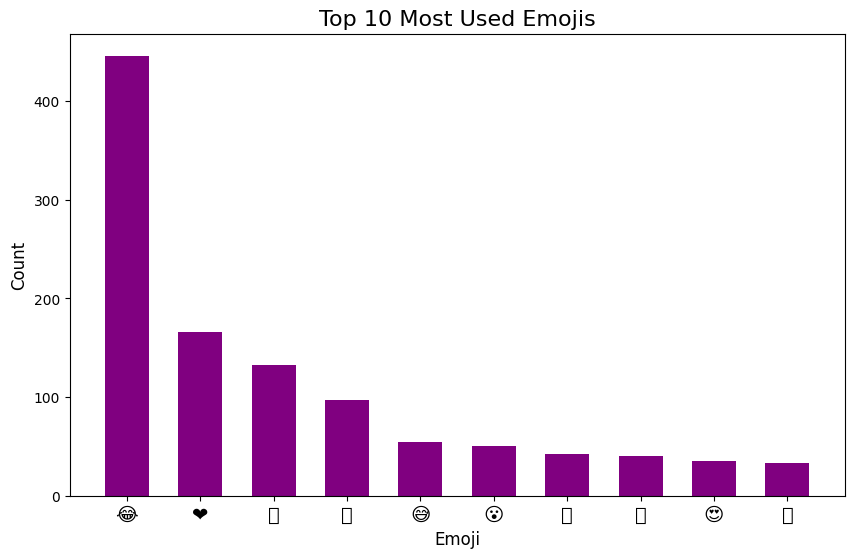

In [ ]:
import emoji
from collections import Counter
import matplotlib.pyplot as plt

# Step 1: Extract emojis from messages
def extract_emojis(text):
    return ''.join(c for c in text if emoji.is_emoji(c))

# Apply the function to extract emojis from each message
sentiment_df['emojis'] = sentiment_df['message'].apply(extract_emojis)

# Step 2: Analyze emoji usage
emoji_counts = Counter(''.join(sentiment_df['emojis'].tolist()))
top_emojis = emoji_counts.most_common(10)  # Get top 10 most used emojis

# Step 3: Prepare data for plotting
emojis, counts = zip(*top_emojis)  # Unzip the list of tuples

# Step 4: Plot the emoji usage graph
plt.figure(figsize=(10, 6))
plt.bar(emojis, counts, color='purple', width=0.6)
plt.title('Top 10 Most Used Emojis', fontsize=16)
plt.xlabel('Emoji', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(fontsize=14)  # Make the emoji labels bigger for better visibility
plt.show()

In [ ]:
import emoji
from collections import Counter
import pandas as pd

# Step 1: Extract emojis from messages
def extract_emojis(text):
    return ''.join(c for c in text if emoji.is_emoji(c))

# Apply the function to extract emojis from each message
sentiment_df['emojis'] = sentiment_df['message'].apply(extract_emojis)

# Step 2: Analyze emoji usage
emoji_counts = Counter(''.join(sentiment_df['emojis'].tolist()))
top_emojis = emoji_counts.most_common(10)  # Get top 10 most used emojis

# Step 3: Prepare data for the CSV
emoji_data = pd.DataFrame(top_emojis, columns=['Emoji', 'Frequency'])

# Step 4: Save the data to a CSV file
csv_path = "/content/drive/MyDrive/emoji_usage.csv"
emoji_data.to_csv(csv_path, index=False)

print(f"CSV file with emoji usage saved at: {csv_path}")

# Step 5: Display the CSV contents
# Read the CSV and display it
display_data = pd.read_csv(csv_path)
print("CSV Contents:")
print(display_data)

# Display the DataFrame nicely in a notebook
from IPython.display import display
display(display_data)

CSV file with emoji usage saved at: /content/drive/MyDrive/emoji_usage.csv
CSV Contents:
  Emoji  Frequency
0     😂        446
1     ❤        166
2     🤣        133
3     🔥         97
4     😅         54
5     😮         50
6     ✅         42
7     💀         40
8     😍         35
9     🏻         33


Emoji  Frequency
0     😂        446
1     ❤        166
2     🤣        133
3     🔥         97
4     😅         54
5     😮         50
6     ✅         42
7     💀         40
8     😍         35
9     🏻         33

In [ ]:
# @title Chat History Analysis
from bs4 import BeautifulSoup
import os
import pandas as pd
from collections import Counter
from google.colab import drive

# Step 1: Mount Google Drive
drive.mount('/content/drive')

# Step 2: Define the path to the Instagram inbox messages folder
messages_path = "/content/drive/MyDrive/INSTA_DATA/extracted_data/your_instagram_activity/messages/inbox/"

# Step 3: Extract sender data from HTML files
def extract_chat_data(file_path):
    messages = []
    print(f"Processing: {file_path}")

    try:
        with open(file_path, 'r', encoding='utf-8') as f:
            soup = BeautifulSoup(f, 'html.parser')

            # Look for the sender in the appropriate div
            sender_divs = soup.find_all('div', class_='_3-95 _2pim _a6-h _a6-i')
            for div in sender_divs:
                sender = div.get_text(strip=True)  # Get the sender's name
                messages.append(sender)

    except Exception as e:
        print(f"Error processing {file_path}: {e}")

    return messages

# Step 4: Collect all chat data from the inbox folder
def collect_all_chats(messages_path):
    all_senders = []
    for folder_name in os.listdir(messages_path):
        folder_path = os.path.join(messages_path, folder_name)
        if os.path.isdir(folder_path):
            for file_name in os.listdir(folder_path):
                if file_name.endswith('.html'):
                    file_path = os.path.join(folder_path, file_name)
                    senders = extract_chat_data(file_path)
                    all_senders.extend(senders)

    print(f"Total messages collected: {len(all_senders)}")
    return all_senders

# Step 5: Perform counting of messages per chat partner
def count_chat_partners(senders):
    chat_counts = Counter(senders)  # Count occurrences of each sender
    return pd.DataFrame(chat_counts.items(), columns=['Chat Partner', 'Message Count'])

# Step 6: Collect all chats and count messages per chat partner
all_senders = collect_all_chats(messages_path)
chat_df = count_chat_partners(all_senders)

# Step 7: Save and display the results
csv_path = "/content/drive/MyDrive/top_chat_partners.csv"
chat_df.to_csv(csv_path, index=False)

print(f"Top chat partners data saved to: {csv_path}")

# Display the DataFrame
from IPython.display import display
display(chat_df.sort_values(by='Message Count', ascending=False).head(10))  # Display top 10 chat partners

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Processing: /content/drive/MyDrive/INSTA_DATA/extracted_data/your_instagram_activity/messages/inbox/adithyarao_17964910280163219/message_1.html
Processing: /content/drive/MyDrive/INSTA_DATA/extracted_data/your_instagram_activity/messages/inbox/dheerajsaichippada_17952681395163219/message_1.html
Processing: /content/drive/MyDrive/INSTA_DATA/extracted_data/your_instagram_activity/messages/inbox/jaibalaya_1341794042854135/message_1.html
Processing: /content/drive/MyDrive/INSTA_DATA/extracted_data/your_instagram_activity/messages/inbox/haricharanreddy_1160378255364991/message_1.html
Processing: /content/drive/MyDrive/INSTA_DATA/extracted_data/your_instagram_activity/messages/inbox/munipasunooti_1214131966649912/message_1.html
Processing: /content/drive/MyDrive/INSTA_DATA/extracted_data/your_instagram_activity/messages/inbox/nihaaljacob_1158012078928449/message_1.

Chat Partner  Message Count
8           Nihaal Jacob            505
1       Nature'z Clicks!            382
2   Dheeraj Sai Chippada            285
10    Veda Prathik Gattu             95
11           ankur suman             71
14          Gautam Vinod             65
6       Haricharan Reddy             22
9     P Thrigunath Reddy             21
3      Karthikeya Chanda             20
7         Muni Pasunooti             16